In [3]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
def saturation(val): #클램핑함수
  if val> 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

(256, 256, 3)
(256, 256)


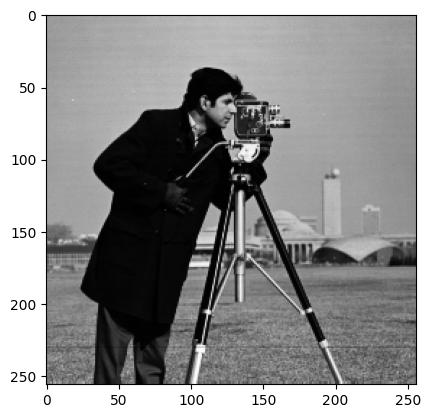

In [5]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/camera.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
plt.imshow(gimg1, cmap='gray')

In [7]:
#룩업테이블 생성
LUT = np.zeros(256,dtype=np.ubyte)

In [9]:
gPoint = np.zeros((gimg1.shape[0],gimg1.shape[1]),dtype=np.ubyte)

In [11]:
for i in range(256):
  val = 255 * (np.float32(i)/128-1) * (np.float32(i)/128-1) #파라볼라
  LUT[i] = val; # 파라볼라로 변환한 비트 룩업테이블에 저장

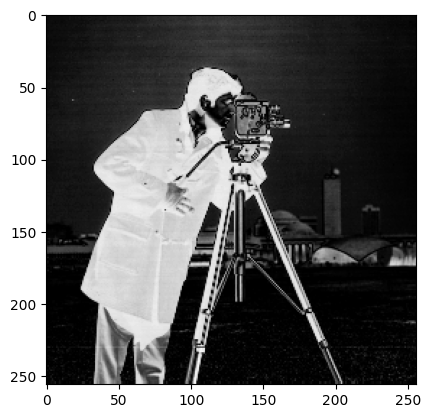

In [13]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    gPoint[h,w] = LUT[gimg1[h,w]]


plt.imshow(gPoint, cmap='gray')

(256, 256, 3)
(256, 256)


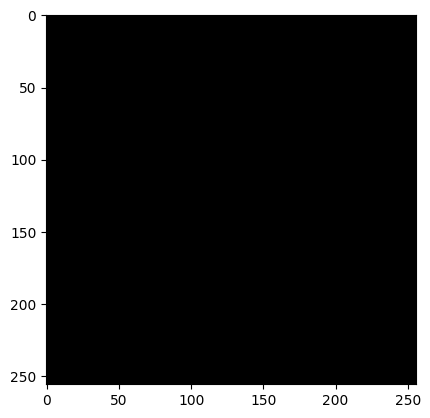

In [15]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/background.bmp')
print(img.shape)
gimg2 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg2.shape)
plt.imshow(gimg2, cmap='gray')

In [16]:
#어두운 정도
print(gimg2[100,100])

50


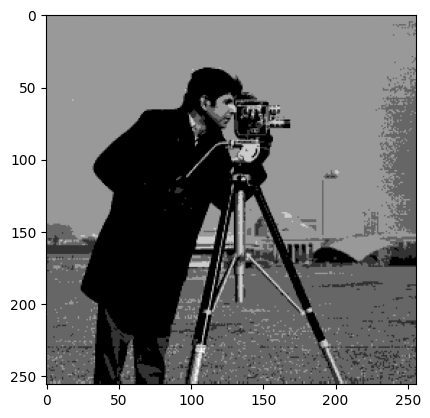

In [18]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    val = np.float32(gimg1[h,w])/ np.float32(gimg2[h,w])
    gPoint[h,w] = saturation(val)



plt.imshow(gPoint, cmap='gray')

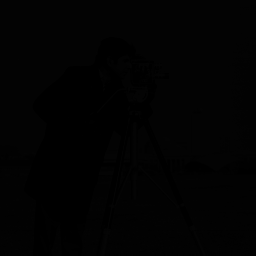

In [20]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    val = np.float32(gimg1[h,w])/ np.float32(gimg2[h,w])
    gPoint[h,w] = saturation(val)



cv2_imshow(gPoint)

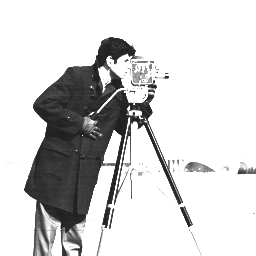

In [23]:
#사진을 밝게 만듬
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    val = np.float32(gimg1[h,w])/ np.float32(gimg2[h,w])
    gPoint[h,w] = saturation(val*200)



cv2_imshow(gPoint)